<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/fr/thumb/e/e5/Logo_%C3%A9cole_des_ponts_paristech.svg/676px-Logo_%C3%A9cole_des_ponts_paristech.svg.png" width="200"  height="200" hspace="200"/> </td>
<td> <img src="https://pbs.twimg.com/profile_images/1156541928193896448/5ihYIbCQ_200x200.png" width="200" height="200" /> </td>
</tr></table>

<br/>

<h1><center>Session 6 - Unsupervised modeling</center></h1>



<font size="3">This session is divided into **3** parts:
- **Loading data**
- **Clustering**
- **Topic modeling**

In each of these parts, some **guidelines** and **hints** are given for each task. 
Do not hesitate to check the links to documentation to understand the functions you use. 
    
The goal of this session is to **implement different unsupervised models** to **create clusters** among movies and to see **which topics emerge** from movies description.
</font>

# 0 - Useful libraries

In [1]:
import pandas as pd
import numpy as np
import random as rd
import json
from matplotlib import pyplot as plt

# 1. Loading data

In [2]:
# Load dataset for unsupervised modeling
data = pd.read_csv('dataset_unsupervised.csv')

# Load tagline data
with open('movies_tagline.json', 'r') as f:
    tagline = json.load(f)
df_tagline = pd.DataFrame.from_dict(tagline, orient='index', columns=['tagline']).reset_index().rename({'index': 'id'}, axis=1)
df_tagline['id'] = df_tagline['id'].astype(int)

# Load overview data
with open('movies_overview.json', 'r') as f:
    overview = json.load(f)
df_overview = pd.DataFrame.from_dict(overview, orient='index', columns=['overview']).reset_index().rename({'index': 'id'}, axis=1)
df_overview['id'] = df_overview['id'].astype(int)

# Merge datasets
data = data.merge(df_tagline, on='id', how='left').merge(df_overview, on='id', how='left')

# Create dictionary to associate a movie ID to its title (will be used for exploration later)
dict_title = data[['id', 'title']].set_index('id').to_dict()['title']

# Drop variables useless for the modeling part (clustering and topic modeling)
data = data.drop(['release_date', 'title', 'index'], axis=1)

In [3]:
data.head()

,year,sales,is_part_of_collection,budget,runtime,original_lang_en,original_lang_es,original_lang_fr,original_lang_it,original_lang_ja,...,mean_3_popularity,mean_5_popularity,actor_1_sales,actor_2_sales,actor_3_sales,mean_sales_actor,max_sales_actor,id,tagline,overview
0,2000,139087,0,25000000.0,120.0,0,0,1,0,0,...,0.489158,0.373572,0.0,0.0,0.0,0.0,0.0,2475,,Comme les Mousquetaires dont elles possèdent l...
1,2000,66228,0,22000000.0,142.0,1,0,0,0,0,...,1.404085,1.229533,0.0,0.0,0.0,0.0,0.0,2870,,"New York, été 1977. Alors que la ville connait..."
2,2000,1463152,0,25000000.0,77.0,0,1,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2706,,
3,2000,32954,0,25000000.0,116.0,1,0,0,0,0,...,0.465217,0.346425,0.0,0.0,0.0,0.0,0.0,11980,,"Félicia, dix-sept ans, traverse la mer d'Irlan..."
4,2000,223564,1,40000000.0,99.0,1,0,0,0,0,...,2.802817,2.044138,0.0,0.0,0.0,0.0,0.0,2480,Il reprend du service.,Arthur Bishop pensait qu'il avait mis son pass...


# 2. Clustering

In [4]:
# For movie clustering, textual variables are not usefull, let's drop them
data_clustering = data.drop(['overview', 'tagline'], axis=1)

In [5]:
# Normalize data

In [6]:
# Split the dataset into a train part and a test part (with a ratio 80/20 for example)
# Hint: take a look at the train_test_split() function from sklearn 
# (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data_clustering, test_size = 0.2)

## 2.1. K-means

In [7]:
from sklearn.cluster import KMeans

In [8]:
X_test_kmeans = X_test.copy()

In [9]:
# Choose a number k of clusters 
k = 10

In [10]:
# Initialize a K-means model
km = KMeans(n_clusters = k, random_state = 0)

In [11]:
# Fit the K-means model to your data
km = km.fit(X_train)

In [12]:
# Predict on your test set
predictions = km.predict(X_test_kmeans)

In [13]:
# Explore your results
# Hint: merge your predictions with your initial dataset X_test_kmeans and use the dict_title object to retrieve which title is associated to
# each movie ID. From there you will be able to know which movies are in each cluster
X_test_kmeans['prediction'] = predictions
X_test_kmeans['title'] = X_test_kmeans['id'].map(dict_title)

In [14]:
# Print the first 10 movies (identified with their titles) associated to a each cluster
# Hint: use a for loop on the number of clusters and use .loc to find movies that are related to the given cluster
for nb in set(X_test_kmeans['prediction']):
    print('Cluster: ', nb)
    print('Number of movies in cluster: ', len(X_test_kmeans.loc[X_test_kmeans['prediction'] == nb]['title']))
    print('Titles: ', X_test_kmeans.loc[X_test_kmeans['prediction'] == nb]['title'][:10])
    print('----- ')

Cluster:  0
Number of movies in cluster:  221
Titles:  4352              Only Lovers Left Alive
2587    Une Fiancée Pas Comme Les Autres
5920                    La Route sauvage
2138                         You Kill Me
5078                       Merci patron!
6228               Happy Birthdead 2 You
2035                       Hyper tension
2565                            Hamlet 2
4297                             Don Jon
6386                      Never Grow Old
Name: title, dtype: object
----- 
Cluster:  1
Number of movies in cluster:  15
Titles:  3344                                           Rango
3625                Sherlock Holmes 2 : Jeu d'ombres
674               Windtalkers, les messagers du vent
1527                              Les 4 Fantastiques
5927                      Rampage - Hors de contrôle
1663                                            Mary
3905    Twilight - Chapitre 5 : Révélation 2e partie
4576                                   Ninja Turtles
2209                   

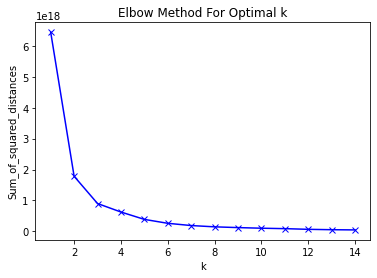

In [15]:
# Try the elbow method to find the optimal number k of clusters. Train a new K-means model with this number, make predictions and explore the
# results
# Hint: use the function plot_elbow() to determine the optimal k
X_test_kmeans = X_test.copy()

def plot_elbow(X_train, K):
    Sum_of_squared_distances = []
    for k in range(1, K):
        km = KMeans(n_clusters = k, random_state = 0)
        km = km.fit(X_train)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(range(1, K), Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
plot_elbow(X_train, 15)

In [16]:
# Define optimal k and re-train a K-means model
optimal_k = 3
km = KMeans(n_clusters=optimal_k, random_state=0).fit(X_train)

# Make predictions on test set and add corresponding title
X_test_kmeans['prediction'] = km.predict(X_test_kmeans)
X_test_kmeans['title'] = X_test_kmeans['id'].map(dict_title)

In [17]:
# Print the first 10 movies associated to a each cluster
for nb in set(X_test_kmeans['prediction']):
    print('Cluster: ', nb)
    print('Number of movies in cluster: ', len(X_test_kmeans.loc[X_test_kmeans['prediction'] == nb]['title']))
    print('Titles: ', X_test_kmeans.loc[X_test_kmeans['prediction'] == nb]['title'][:10])
    print('----- ')

Cluster:  0
Number of movies in cluster:  39
Titles:  5840                                       Black Panther
5242                         Independence Day Resurgence
406                                La Planète des singes
2108                                  Shrek Le Troisième
3377                                                Thor
3344                                               Rango
3717                               Marvel's The Avengers
1845    Pirates des Caraïbes, le secret du coffre maudit
5212                                    Le Monde de Dory
5339                                      Doctor Strange
Name: title, dtype: object
----- 
Cluster:  1
Number of movies in cluster:  1199
Titles:  4352              Only Lovers Left Alive
62                               Hypnose
174               Merci pour le chocolat
4670              La Rançon de la Gloire
632                   Sexes très opposés
1520                         Emmenez-moi
5938        Plaire, aimer et courir vite

# 3. Topic modeling

In [19]:
import wordcloud
from nlpretext import Preprocessor
from nlpretext.basic.preprocess import (
    fix_bad_unicode, lower_text, remove_eol_characters, remove_accents, remove_punct, remove_stopwords,
    normalize_whitespace
)

In [24]:
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz
#!pip install https://github.com/explosion/spacy-models/releases/download/fr_core_news_sm-2.3.0/fr_core_news_sm-2.3.0.tar.gz

In [20]:
custom_stopwords = ['vie', 'ans', 'jeune', 'film', 'femme', 'homme', 'famille', 'pere', 'fille', 'mere', 'monde',
                    'jour', 'ete']

def preprocess(df_text, custom_stopwords=custom_stopwords):
    df_text = df_text.loc[df_text['text'] != ' ']
    df_text['text_prepro'] = df_text['text'].map(fix_bad_unicode)
    df_text['text_prepro'] = df_text['text_prepro'].map(lower_text)
    df_text['text_prepro'] = df_text['text_prepro'].map(remove_eol_characters)
    df_text['text_prepro'] = df_text['text_prepro'].map(remove_accents)
    df_text['text_prepro'] = df_text['text_prepro'].map(remove_punct)
    df_text['text_prepro'] = df_text['text_prepro'].map(lambda x: remove_stopwords(
        x, lang='fr', custom_stopwords=custom_stopwords))
    df_text['text_prepro'] = df_text['text_prepro'].map(normalize_whitespace)
    df_text['tokens'] = df_text['text_prepro'].map(lambda x: x.split())
    return df_text


def make_word_cloud(text_df: pd.DataFrame):
    """
    Function that computes word cloud from tokens

    Parameters
    ----------
    text_df: pd.DataFrame
        dataframe with text column
    cmp: matplotlib.colors.LinearSegmentedColormap
        colormap for the wordcloud
    """
    text = ' '.join([' '.join(el) for el in text_df['tokens']])
    if isinstance(text, str):
        wordcloud_ = wordcloud.WordCloud(background_color='white', width=700, height=500).generate(text)
    else:
        raise TypeError('text_df contains non str values')
    plt.imshow(wordcloud_)
    plt.axis("off")
    plt.show()

In [21]:
# Create a 'text' column that is a combination of the tagline and the overview
# Example:
# - tagline = 'Il reprend du service.'
# - overview = 'Arthur Bishop pensait qu'il avait mis son passé de tueur à gages derrière lui. ... etc'
# -> text = 'Il reprend du service. Arthur Bishop pensait qu'il avait mis son passé de tueur à gages derrière lui. ... etc'
data['text'] = data['tagline'] + ' ' + data['overview']

In [22]:
preprocessed_text = preprocess(pd.DataFrame(data.iloc[0]).T)
print('Raw text:', data['text'][0])
print()
print('Preprocessed text:', preprocessed_text['text_prepro'][0])
print()
print('Preprocessed tokens:', preprocessed_text['tokens'][0])

Raw text:  Comme les Mousquetaires dont elles possèdent le cran, l’âme festive et le sens de l’amitié… Ces battantes vivent à Paris et, au premier jour de l’an 2000, elles remettent à l’heure les pendules de leurs vies.  A 35 ans, elles ne croient plus au prince charmant. Leurs carrières théâtrales battent de l’aile et leurs maigres porte-feuilles ne tiennent peut-être qu’à une larme ou un sourire.

Preprocessed text: mousquetaires possedent cran ame festive sens amitie battantes vivent paris an 2000 remettent heure pendules vies 35 croient prince charmant carrieres theatrales battent aile maigres porte feuilles tiennent larme sourire

Preprocessed tokens: ['mousquetaires', 'possedent', 'cran', 'ame', 'festive', 'sens', 'amitie', 'battantes', 'vivent', 'paris', 'an', '2000', 'remettent', 'heure', 'pendules', 'vies', '35', 'croient', 'prince', 'charmant', 'carrieres', 'theatrales', 'battent', 'aile', 'maigres', 'porte', 'feuilles', 'tiennent', 'larme', 'sourire']


In [23]:
# Preprocess the 'text' column:
# - transform the text to lowercase
# - remove end of line characters
# - remove accents
# - remove punctuation
# - remove stopwords
# - split the preprocessed text into words (i.e. tokens) and store it into a new column named 'tokens'

import warnings
warnings.filterwarnings('ignore')

data = preprocess(data)

## 3.1 LDA

In [25]:
import gensim
import gensim.corpora as corpora

In [26]:
# Create a list of all tokens associated to each movie and store it into the variable data_words
data_words = data['tokens'].tolist()
print(data_words[:1][0][:10])

['mousquetaires', 'possedent', 'cran', 'ame', 'festive', 'sens', 'amitie', 'battantes', 'vivent', 'paris']


In [27]:
# Create a Dictionary based on the all the words per movie
# Hint: explore the gensim library (specifically the 'corpora' section...)
id2word = corpora.Dictionary(data_words)

In [30]:
# Create a Corpus for each text associated to each movie
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [31]:
# Define a number of topics
num_topics = 7

In [32]:
# Train a LDA model
# Hint: explore the gensim library (specifically the 'models' section...)
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

In [33]:
# Print the keywords in the n topics
# Hint: maybe the gensim LDA model has a built-in function to do so...
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.007*"histoire" + 0.004*"temps" + 0.003*"grand" + 0.003*"enfants" + '
  '0.003*"jamais" + 0.003*"amis" + 0.003*"decide" + 0.003*"nouvelle" + '
  '0.002*"annees" + 0.002*"guerre"'),
 (1,
  '0.004*"fils" + 0.004*"ville" + 0.003*"petit" + 0.003*"new" + 0.003*"vient" '
  '+ 0.003*"rencontre" + 0.002*"amour" + 0.002*"annees" + 0.002*"histoire" + '
  '0.002*"york"'),
 (2,
  '0.003*"grand" + 0.003*"nouvelle" + 0.003*"decide" + 0.002*"amour" + '
  '0.002*"fils" + 0.002*"jamais" + 0.002*"parents" + 0.002*"ville" + '
  '0.002*"passe" + 0.002*"retrouver"'),
 (3,
  '0.004*"passe" + 0.003*"fils" + 0.003*"enfants" + 0.003*"petit" + '
  '0.003*"grand" + 0.002*"histoire" + 0.002*"mort" + 0.002*"decide" + '
  '0.002*"amour" + 0.002*"retrouve"'),
 (4,
  '0.006*"histoire" + 0.004*"amour" + 0.003*"decide" + 0.003*"grand" + '
  '0.003*"enfants" + 0.003*"rencontre" + 0.003*"temps" + 0.002*"annees" + '
  '0.002*"petit" + 0.002*"decouvre"'),
 (5,
  '0.004*"parents" + 0.004*"amis" + 0.003*"grand" + 0.

In [34]:
# Visualize the topics
# Hint: use pyLDAvis
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
LDAvis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.004684 -0.004205       1        1  17.948801
2     -0.007307 -0.015822       2        1  17.062464
4     -0.022773  0.003999       3        1  16.570019
5     -0.026722 -0.067140       4        1  15.246175
6     -0.036208  0.073214       5        1  11.112140
1      0.091953  0.009292       6        1  11.109602
3     -0.003627  0.000662       7        1  10.950809, topic_info=          Term        Freq       Total Category  logprob  loglift
502       fils  520.000000  520.000000  Default  30.0000  30.0000
163   histoire  967.000000  967.000000  Default  29.0000  29.0000
55        york  193.000000  193.000000  Default  28.0000  28.0000
522      vient  318.000000  318.000000  Default  27.0000  27.0000
54       ville  530.000000  530.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
503     jamais   41.441910  438.402344   Topic7  -6.4886  -0.1471
364     annees   42.808701  559.772705   Topic7  -6.4561  -0.3590
54       ville   42.410477  530.550415   Topic7  -6.4655  -0.3148
57         ami   39.998672  343.017151   Topic7  -6.5240   0.0628
2698      face   38.551544  392.366425   Topic7  -6.5609  -0.1084

[646 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
32095      5  0.851674        1429
32313      6  0.889413         180
32045      5  0.851678        1849
32151      2  0.956803         212
5594       1  0.063947           9
...      ...       ...         ...
16112      3  0.042366     zombies
16112      4  0.677854     zombies
16112      5  0.042366     zombies
16112      7  0.127098     zombies
31934      7  0.897180  zoologique

[1795 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 6, 7, 2, 4])

In [35]:
# What are your conclusions regarding the topics? (coherence, stability, ...)

## 3.2 To go further on Topic Modeling: Top2Vec

In [36]:
from top2vec import Top2Vec
# Pre-requisites for top2vec: keras_applications, keras_preprocessing

### 3.2.1 Topics interpretation

In [37]:
# Load the trained Top2Vec model
model_bis = Top2Vec.load('top2vec_imdb.pickle')

# Get information about the model: number of topics found and their sizes
n_topics_found = model_bis.get_num_topics()
topic_sizes, topic_nums = model_bis.get_topic_sizes()

print('Number of topics found:', n_topics_found)
print('Topic sizes:')
for n in range(n_topics_found):
    print('Topic ', n, ' - Size: ', topic_sizes[n])
    print(' ----- ')

Number of topics found: 18
Topic sizes:
Topic  0  - Size:  1559
 ----- 
Topic  1  - Size:  1077
 ----- 
Topic  2  - Size:  641
 ----- 
Topic  3  - Size:  449
 ----- 
Topic  4  - Size:  449
 ----- 
Topic  5  - Size:  354
 ----- 
Topic  6  - Size:  247
 ----- 
Topic  7  - Size:  241
 ----- 
Topic  8  - Size:  235
 ----- 
Topic  9  - Size:  235
 ----- 
Topic  10  - Size:  202
 ----- 
Topic  11  - Size:  193
 ----- 
Topic  12  - Size:  189
 ----- 
Topic  13  - Size:  164
 ----- 
Topic  14  - Size:  142
 ----- 
Topic  15  - Size:  126
 ----- 
Topic  16  - Size:  92
 ----- 
Topic  17  - Size:  81
 ----- 


In [38]:
# Explore the results part 1: check the texts with the best scores in each cluster

# Change "nb" between 0 and 17 to explore each cluster
# Clusters are sorted according to the number of texts they contain (exploring clusters between 0 and 10 may be
# enough to have a good overview of what main clusters represent)
nb = 0

# You can also change the number of texts to display for each cluster with 'num_docs'
num_docs = 7

documents, document_scores, document_ids = model_bis.search_documents_by_topic(topic_num = nb, num_docs = num_docs)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    print("-----------")

Document: 196, Score: 0.9136438965797424
 La fine équipe se retrouve pour une folle chasse au trésor afin d'empocher 500 millions de roupies.
-----------
Document: 5093, Score: 0.9112980365753174
Une vraie gueule d'ange Hellboy affronte Nimue, épouse de Merlin et Reine de Sang. Leur lutte amorcera la fin du monde, un sort que le héros devra éviter à tout prix.
-----------
Document: 408, Score: 0.903130054473877
Traîtres ou héros? Début 90. Un groupe de Cubains installés à Miami met en place un réseau d’espionnage. Leur mission : infiltrer les groupuscules anti-castristes responsables d’attentats sur l’île.
-----------
Document: 6635, Score: 0.8978111743927002
 Le légendaire sauveteur Mitch Buchannon est contraint de s’associer à une nouvelle recrue, Matt Brody, aussi ambitieux que tête brûlée ! Ensemble, ils vont tenter de déjouer un complot criminel qui menace l'avenir de la Baie…
-----------
Document: 388, Score: 0.8973255157470703
Dans les profondeurs de l'océan, quelque chose s'est

Topic 0


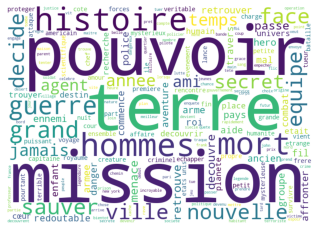

Topic 1


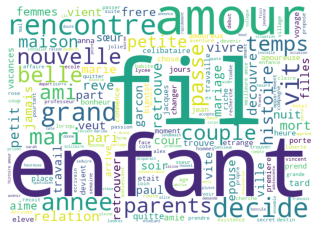

Topic 2


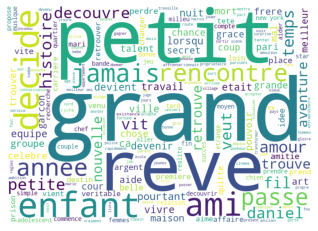

Topic 3


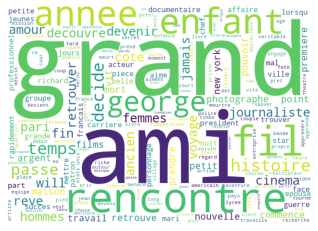

Topic 4


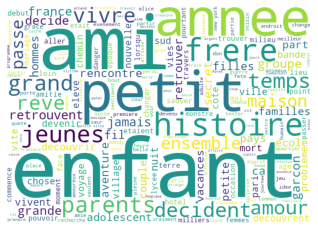

Topic 5


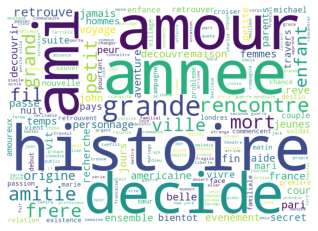

Topic 6


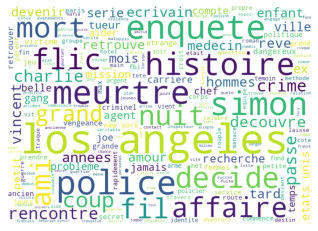

Topic 7


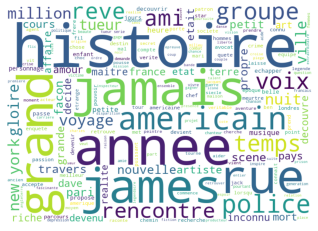

Topic 8


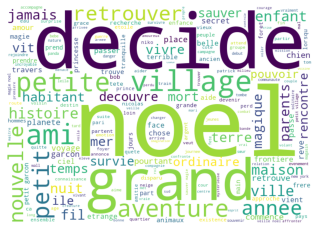

Topic 9


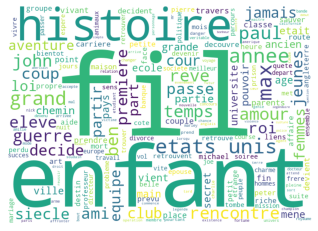

Topic 10


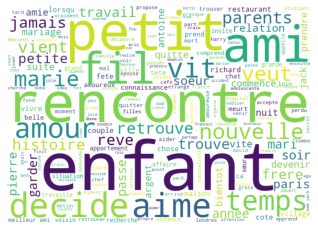

In [39]:
# Explore the results part 2: check the wordclouds associated to each cluster
# Wordclouds are really helpful to have a quick overview of most important words related to each topic
# They can help to interpret each topic

import warnings
warnings.filterwarnings('ignore')

for nb in range(11):
    documents, document_scores, document_ids = model_bis.search_documents_by_topic(topic_num=nb, num_docs=topic_sizes[nb])
    df_text = preprocess(pd.DataFrame(documents, columns=['text']))
    print('Topic', nb)
    make_word_cloud(df_text)

In [40]:
# What would be your interpretation for each cluster ?

# Topic 0: action
# Topic 1: comédie romantique
# Topic 2: drame
# Topic 3: Court-metrage
# Topic 4: histoire de jeunes, duos
# Topic 5: histoire de famille
# Topic 6: flic, los angeles
# Topic 7: histoire, culture
# Topic 8: noël
# Topic 9: aventure
# Topic 10: amour

### 3.2.2 To go further: train your own Top2Vec model

In [43]:
# Create a new dataset for top2vec model, from the 'data' dataframe, do not take movies with empty text 
# into account
data_top2vec = data.loc[(data['text'] != '') & (data['text'].isnull() == False)]

# Make a list from the 'text' column that will contain all texts associated to all movies
all_texts = data_top2vec["text"].tolist()

In [44]:
# Train a top2vec model
model = Top2Vec(documents=all_texts, speed="learn")

2021-03-17 12:29:08,026 - top2vec - INFO - Pre-processing documents for training
2021-03-17 12:29:10,694 - top2vec - INFO - Creating joint document/word embedding
2021-03-17 12:30:00,427 - top2vec - INFO - Creating lower dimension embedding of documents
2021-03-17 12:30:16,938 - top2vec - INFO - Finding dense areas of documents
2021-03-17 12:30:17,511 - top2vec - INFO - Finding topics


In [45]:
# Explore the results:
# - number of topics found
# - topics sizes

n_topics_found = model.get_num_topics()
topic_sizes, topic_nums = model.get_topic_sizes()
print('Number of topics found:', n_topics_found)
print('Topic sizes:')
for n in range(n_topics_found):
    print('Topic ', n, ' - Size: ', topic_sizes[n])
    print(' ----- ')

Number of topics found: 2
Topic sizes:
Topic  0  - Size:  5924
 ----- 
Topic  1  - Size:  471
 ----- 


In [155]:
# Save your model for later if you want to explore it in more details
# model.save('top2vec_imdb_bis.pickle')